<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/SerieTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
import statsmodels.api as sm

In [ ]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [ ]:
df=pd.read_excel(io.BytesIO(uploaded["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)#df con los datos de la población
df

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
...,...,...,...,...,...
722,2021,Tlaxcala,131,29,160
723,2021,Veracruz de Ignacio de la Llave,812,109,922
724,2021,Yucatán,47,8,55
725,2021,Zacatecas,1578,171,1767


In [ ]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask1 = (df['EDO'] != 'Total') 

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df = df.drop(df[mask1].index)

df

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
33,2001,Total,8986,1282,10285
66,2002,Total,8797,1280,10088
99,2003,Total,8754,1316,10087
132,2004,Total,8115,1206,9329
165,2005,Total,8610,1297,9921
198,2006,Total,9143,1298,10452
231,2007,Total,7776,1083,8867
264,2008,Total,12574,1425,14006
297,2009,Total,17838,1925,19803


In [ ]:
df=df.drop(columns=['Hombre', 'Total', 'EDO'])
df

,AÑO,Mujer
0,2000,1284
33,2001,1282
66,2002,1280
99,2003,1316
132,2004,1206
165,2005,1297
198,2006,1298
231,2007,1083
264,2008,1425
297,2009,1925


In [ ]:
df.index=df.AÑO
df

,AÑO,Mujer
AÑO,,
2000,2000,1284
2001,2001,1282
2002,2002,1280
2003,2003,1316
2004,2004,1206
2005,2005,1297
2006,2006,1298
2007,2007,1083
2008,2008,1425


##SERIE DE TIEMPO:

In [ ]:
from statsmodels.tsa.arima.estimators.statespace import SARIMAX

In [ ]:
modelo = SARIMAX(df.Mujer,order=(2,0,0)).fit()
modelo.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Mujer   No. Observations:                   22
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -150.653
Date:                Mon, 24 Apr 2023   AIC                            307.306
Time:                        21:49:54   BIC                            310.579
Sample:                             0   HQIC                           308.077
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6405      0.170      9.632      0.000       1.307       1.974
ar.L2         -0.6475      0.177     -3.660      0.000      -0.994      -0.301
sigma2      3.981e+04   1.25e+04      3.186      0.001    1.53e+04    6.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.18   Prob(JB):                         0.26
Heteroskedasticity (H):               6.46   Skew:                             0.86
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


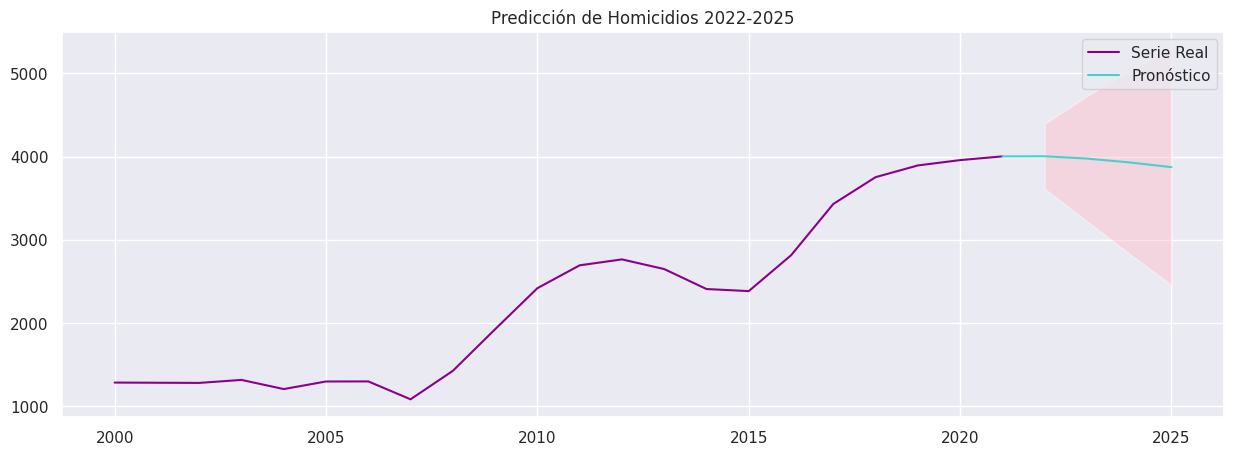

In [ ]:
forcast = modelo.forecast(4)
conf = modelo.get_forecast(4).conf_int(alpha=0.05)

date = np.array(('2022','2023','2024','2025'))
forcast.index = date
conf.index = date
conf = pd.concat((conf,forcast),axis=1)

tam = len(df.Mujer)
na = np.empty(tam)
na[:] = np.nan
na[-1] = df.Mujer.iloc[-1]
na = np.hstack((na,forcast))
date2 = np.hstack(((df.Mujer.index , date)))
fore = pd.DataFrame(na)
fore.index = date2
data_total2 = np.hstack((df.Mujer.values,np.nan,np.nan,np.nan,np.nan))
data_total2 = pd.DataFrame(data_total2)
data_total2.index = date2
pronostico = pd.concat((data_total2,fore),axis=1)
pronostico.columns = ("Serie Real","Pronóstico")

mat = np.empty((tam,3))
mat[:,:] = np.nan
mat = pd.DataFrame(mat)

IC = pd.concat((mat,conf))
IC = IC.drop([0,1,2],axis=1)
IC.index = date2

fig, axes = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(15,5), )
plt.title('Predicción de Homicidios 2022-2025')
pronostico.plot(color=('darkmagenta','mediumturquoise'),ax=axes)
axes.fill_between(IC["predicted_mean"].index, IC['lower Mujer'], IC['upper Mujer'],facecolor='lightpink', alpha=0.4, label='Prediction Interval')
plt.show()